# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Temperature units
units = 'Imperial'

# Output File (CSV)
output_data_file = "output_data/weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lats = []
city_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lats.append(lat_lng[0])
        city_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count

print(len(cities))
print(len(city_lats))
print(len(city_lngs))

609
609
609


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
temps = []
humidities = []
clouds = []
wind = []

for city in cities:
    target_city = city
    target_url = f'{base_url}q={target_city}&appid={weather_key}&units={units}'
    target_city_index = cities.index(city) + 1
    city_data = requests.get(target_url).json()
    
    print(f'#{target_city_index} - Getting data from {target_city}')
    try:
        temps.append(city_data['main']['temp'])
    except:
        temps.append("NAN")
        print(f'No temperature data for {target_city}, skipping...')
        
    try:
        humidities.append(city_data['main']['humidity'])
    except:
        humidities.append("NAN")
        print(f'No humidity data for {target_city}, skipping...')
        
    try:
        clouds.append(city_data['clouds']['all'])
    except:
        clouds.append("NAN")
        print(f'No cloud coverage data for {target_city}, skipping...')

    try:
        wind.append(city_data['wind']['speed'])
    except:
        wind.append("NAN")
        print(f'No wind data for {target_city}, skipping...')
        
print(len(temps))
print(len(humidities))
print(len(clouds))
print(len(wind))

#1 - Getting data from paamiut
#2 - Getting data from bandarbeyla
#3 - Getting data from nizhneyansk
No temperature data for nizhneyansk, skipping...
No humidity data for nizhneyansk, skipping...
No cloud coverage data for nizhneyansk, skipping...
No wind data for nizhneyansk, skipping...
#4 - Getting data from rikitea
#5 - Getting data from mehamn
#6 - Getting data from cheney
#7 - Getting data from summerland
#8 - Getting data from kirakira
#9 - Getting data from west plains
#10 - Getting data from bredasdorp
#11 - Getting data from barentsburg
No temperature data for barentsburg, skipping...
No humidity data for barentsburg, skipping...
No cloud coverage data for barentsburg, skipping...
No wind data for barentsburg, skipping...
#12 - Getting data from san patricio
#13 - Getting data from utiroa
No temperature data for utiroa, skipping...
No humidity data for utiroa, skipping...
No cloud coverage data for utiroa, skipping...
No wind data for utiroa, skipping...
#14 - Getting data fr

#162 - Getting data from geraldton
#163 - Getting data from viedma
#164 - Getting data from tromso
#165 - Getting data from mogadishu
#166 - Getting data from butaritari
#167 - Getting data from dikson
#168 - Getting data from yinchuan
#169 - Getting data from venado tuerto
#170 - Getting data from kununurra
#171 - Getting data from antofagasta
#172 - Getting data from husavik
#173 - Getting data from iralaya
#174 - Getting data from tiruvottiyur
No temperature data for tiruvottiyur, skipping...
No humidity data for tiruvottiyur, skipping...
No cloud coverage data for tiruvottiyur, skipping...
No wind data for tiruvottiyur, skipping...
#175 - Getting data from hobyo
#176 - Getting data from aquiraz
#177 - Getting data from padang
#178 - Getting data from suluq
#179 - Getting data from kautokeino
#180 - Getting data from ponta do sol
#181 - Getting data from careiro da varzea
#182 - Getting data from camocim
#183 - Getting data from surgut
#184 - Getting data from neuquen
#185 - Getting

#338 - Getting data from caceres
#339 - Getting data from sinnamary
#340 - Getting data from sabang
#341 - Getting data from salalah
#342 - Getting data from amderma
No temperature data for amderma, skipping...
No humidity data for amderma, skipping...
No cloud coverage data for amderma, skipping...
No wind data for amderma, skipping...
#343 - Getting data from dunedin
#344 - Getting data from rapid valley
#345 - Getting data from ishim
#346 - Getting data from taywarah
#347 - Getting data from kapoeta
#348 - Getting data from ayolas
#349 - Getting data from acapulco
#350 - Getting data from kemin
#351 - Getting data from bartica
#352 - Getting data from adrar
#353 - Getting data from palotina
#354 - Getting data from pokrovka
#355 - Getting data from noumea
#356 - Getting data from baykit
#357 - Getting data from salekhard
#358 - Getting data from henties bay
#359 - Getting data from londoko
#360 - Getting data from karratha
#361 - Getting data from tsogni
#362 - Getting data from kho

#490 - Getting data from baiquan
#491 - Getting data from ust-nera
#492 - Getting data from kargasok
#493 - Getting data from chara
#494 - Getting data from rudnogorsk
#495 - Getting data from tautira
#496 - Getting data from kirkwall
#497 - Getting data from purpe
#498 - Getting data from clinton
#499 - Getting data from road town
#500 - Getting data from tumannyy
No temperature data for tumannyy, skipping...
No humidity data for tumannyy, skipping...
No cloud coverage data for tumannyy, skipping...
No wind data for tumannyy, skipping...
#501 - Getting data from batagay-alyta
#502 - Getting data from labuhan
#503 - Getting data from coxim
#504 - Getting data from portree
#505 - Getting data from sibolga
#506 - Getting data from port hedland
#507 - Getting data from skagastrond
No temperature data for skagastrond, skipping...
No humidity data for skagastrond, skipping...
No cloud coverage data for skagastrond, skipping...
No wind data for skagastrond, skipping...
#508 - Getting data fr

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City': cities, 'Latitude': city_lats, 'Longitude': city_lngs, 'Temperature \N{DEGREE SIGN}F': temps, 'Humidity (%)': humidities, 'Cloud Coverage (%)': clouds, 'Wind Speed (MPH)': wind})
weather_df['City'] = weather_df['City'].str.title()

weather_df['Temperature \N{DEGREE SIGN}F'] = weather_df['Temperature \N{DEGREE SIGN}F'].astype(float)
weather_df['Humidity (%)'] = weather_df['Humidity (%)'].astype(float)
weather_df['Cloud Coverage (%)'] = weather_df['Cloud Coverage (%)'].astype(float)
weather_df['Wind Speed (MPH)'] = weather_df['Wind Speed (MPH)'].astype(float)
# weather_df.dtypes

In [5]:
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humid_100 = weather_df.loc[weather_df['Humidity (%)'] >= 100]
print(f'There are {len(humid_100)} cities where the humidity is greater than 100%')
print(f'Dropping these {len(humid_100)} cities')
weather_df = weather_df.loc[weather_df['Humidity (%)'] < 100]
print(f'There are now {len(weather_df)} cities in the dataframe.')

There are 13 cities where the humidity is greater than 100%
Dropping these 13 cities
There are now 541 cities in the dataframe.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The data unsuprisingly shows that the temperature increases as you near the equator (0° latitude).
If there was more data points in the southern hemisphere (< 0° latitude), this upside-down "u" shape would likely continue.


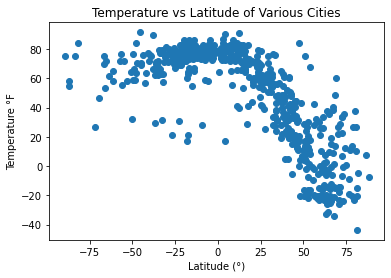

In [7]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature \N{DEGREE SIGN}F'])
plt.title('Temperature vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Temperature \N{DEGREE SIGN}F')
plt.savefig('output_data/Temperature-vs-Latitude.png')
print('The data unsuprisingly shows that the temperature increases as you near the equator (0\N{DEGREE SIGN} latitude).')
print('If there was more data points in the southern hemisphere (< 0\N{DEGREE SIGN} latitude), this upside-down "u" shape would likely continue.')

## Latitude vs. Humidity Plot

According to this sample, there does not seem to be a clear relationship between latitude and humidity.
Humidity is likely related to either longitude, altitude, current weather or other factors.


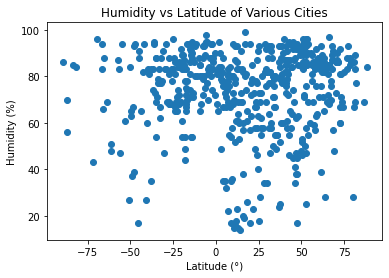

In [8]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'])
plt.title('Humidity vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Humidity-vs-Latitude.png')
print('According to this sample, there does not seem to be a clear relationship between latitude and humidity.')
print('Humidity is likely related to either longitude, altitude, current weather or other factors.')

## Latitude vs. Cloudiness Plot

According to this sample, there does not seem to be a clear relationship between latitude and cloudiness.
Cloudiness is likely related to either longitude, altitude, current weather or other factors.
It appears that the API data source frequently measures cloudiness to the nearest multiple of 5 or 10, as there are several data points at these values.


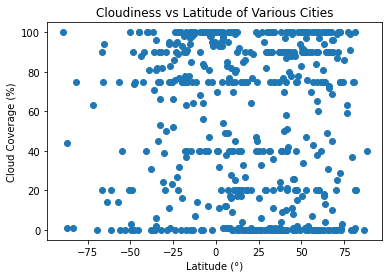

In [9]:
plt.scatter(weather_df['Latitude'], weather_df['Cloud Coverage (%)'])
plt.title('Cloudiness vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Cloud Coverage (%)')
plt.savefig('output_data/Cloudiness-vs-Latitude.png')
print('According to this sample, there does not seem to be a clear relationship between latitude and cloudiness.')
print('Cloudiness is likely related to either longitude, altitude, current weather or other factors.')
print('It appears that the API data source frequently measures cloudiness to the nearest multiple of 5 or 10, as there are several data points at these values.')

## Latitude vs. Wind Speed Plot

According to this sample, there does not seem to be a clear relationship between latitude and wind speed.
Wind speed is likely related to either longitude, altitude, current weather or other factors.


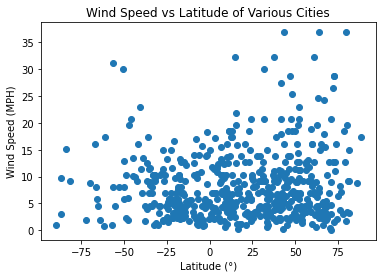

In [10]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (MPH)'])
plt.title('Wind Speed vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('output_data/Wind-Speed-vs-Latitude.png')
print('According to this sample, there does not seem to be a clear relationship between latitude and wind speed.')
print('Wind speed is likely related to either longitude, altitude, current weather or other factors.')

## Linear Regression

In [11]:
north_data = weather_df.loc[weather_df['Latitude'] >= 0]
print(f'There are {len(north_data)} cities in the Northen Hemisphere in the dataset')
south_data = weather_df.loc[weather_df['Latitude'] <= 0]
print(f'There are {len(south_data)} cities in the Southern Hemisphere in the dataset')

There are 367 cities in the Northen Hemisphere in the dataset
There are 174 cities in the Southern Hemisphere in the dataset


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a negative correlation between temperature and latitude in the northern hemisphere.


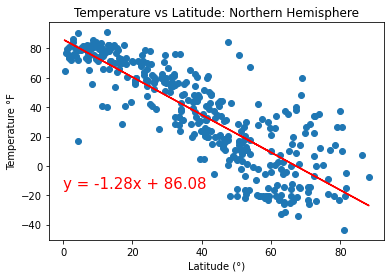

In [12]:
x_values = north_data['Latitude']
y_values = north_data['Temperature \N{DEGREE SIGN}F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.title('Temperature vs Latitude: Northern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Temperature \N{DEGREE SIGN}F')
plt.savefig('output_data/Temperature-vs-Latitude-Northern-Hemisphere.png', format='png')
print('There is a negative correlation between temperature and latitude in the northern hemisphere.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

There is a negative correlation between temperature and latitude in the southern hemisphere. Regression could be improved with more data points near south pole. Lack of cities near there is the issue. Using Latitude/Longitude instead of cities would improve results. 


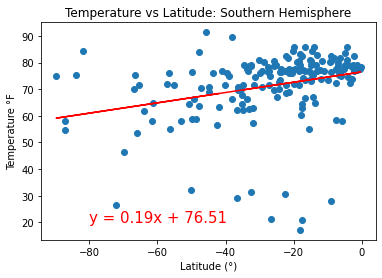

In [13]:
x_values = south_data['Latitude']
y_values = south_data['Temperature \N{DEGREE SIGN}F']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.title('Temperature vs Latitude: Southern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Temperature \N{DEGREE SIGN}F')
plt.savefig('output_data/Temperature-vs-Latitude-Southern-Hemisphere.png')
print('There is a negative correlation between temperature and latitude in the southern hemisphere. Regression could be improved with more data points near south pole. Lack of cities near there is the issue. Using Latitude/Longitude instead of cities would improve results. ')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There seems to be a positive correlation between the humidity and latitude but it is not a strong correlation.


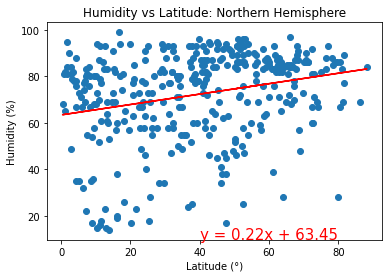

In [14]:
x_values = north_data['Latitude']
y_values = north_data['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('Humidity vs Latitude: Northern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Humidity-vs-Latitude-Northern-Hemisphere.png')
print('There seems to be a positive correlation between the humidity and latitude but it is not a strong correlation.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There seems to be a positive correlation between the humidity and latitude but it is not a strong correlation.


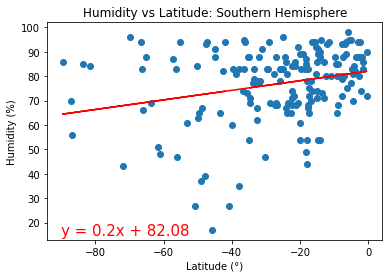

In [15]:
x_values = south_data['Latitude']
y_values = south_data['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-90,15),fontsize=15,color="red")
plt.title('Humidity vs Latitude: Southern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/Humidity-vs-Latitude-Southern-Hemisphere.png')
print('There seems to be a positive correlation between the humidity and latitude but it is not a strong correlation.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no observable correlation between cloudiness and latitude.


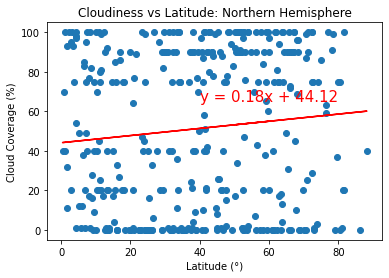

In [16]:
x_values = north_data['Latitude']
y_values = north_data['Cloud Coverage (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,65),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude: Northern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Cloud Coverage (%)')
plt.savefig('output_data/Cloudiness-vs-Latitude-Northern-Hemisphere.png')
print('There is no observable correlation between cloudiness and latitude.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There is no observable correlation between cloudiness and latitude.


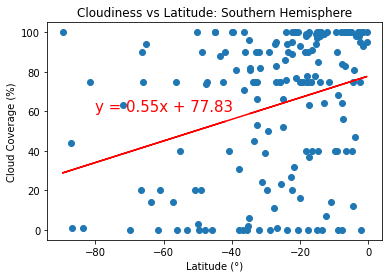

In [17]:
x_values = south_data['Latitude']
y_values = south_data['Cloud Coverage (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,60),fontsize=15,color="red")
plt.title('Cloudiness vs Latitude: Southern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Cloud Coverage (%)')
plt.savefig('output_data/Cloudiness-vs-Latitude-Southern-Hemisphere.png')
print('There is no observable correlation between cloudiness and latitude.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no observable correlation between wind speed and latitude.


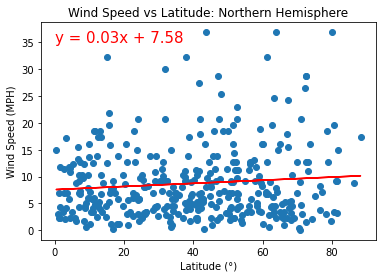

In [18]:
x_values = north_data['Latitude']
y_values = north_data['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.title('Wind Speed vs Latitude: Northern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('output_data/Wind-Speed-vs-Latitude-Northern-Hemisphere.png')
print('There is no observable correlation between wind speed and latitude.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There is no observable correlation between wind speed and latitude.


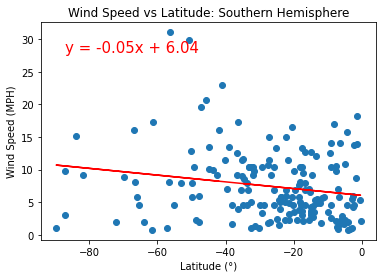

In [19]:
x_values = south_data['Latitude']
y_values = south_data['Wind Speed (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-87,28),fontsize=15,color="red")
plt.title('Wind Speed vs Latitude: Southern Hemisphere')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('output_data/Wind-Speed-vs-Latitude-Southern-Hemisphere.png')
print('There is no observable correlation between wind speed and latitude.')